In [ ]:
import pandas as pd

# Load the datasets
train_path = "/content/DailyDelhiClimateTrain.csv"
test_path = "/content/DailyDelhiClimateTest.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Display basic info about the datasets
print("Train Dataset Info:")
print(df_train.info())

print("\nTest Dataset Info:")
print(df_test.info())

# Show first few rows
print("\nTrain Dataset Sample:")
print(df_train.head())

print("\nTest Dataset Sample:")
print(df_test.head())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None

Train Dataset Sample:
         d

In [ ]:
#Step 2: Preprocessing the Data
# 'date' column to datetime format
# missing values checking and handling
# Selecting relevant columns (meantemp, wind_speed, humidity).
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

# Check for missing values
print("Missing values in Train Data:\n", df_train.isnull().sum())
print("\nMissing values in Test Data:\n", df_test.isnull().sum())

# Select relevant columns for analysis
df_train = df_train[['date', 'meantemp', 'wind_speed', 'humidity']]
df_test = df_test[['date', 'meantemp', 'wind_speed', 'humidity']]

# Display updated train dataset
print("\nUpdated Train Dataset:")
print(df_train.head())


Missing values in Train Data:
 date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Missing values in Test Data:
 date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Updated Train Dataset:
        date   meantemp  wind_speed   humidity
0 2013-01-01  10.000000    0.000000  84.500000
1 2013-01-02   7.400000    2.980000  92.000000
2 2013-01-03   7.166667    4.633333  87.000000
3 2013-01-04   8.666667    1.233333  71.333333
4 2013-01-05   6.000000    3.700000  86.833333


In [ ]:
#no missing values found so moving further

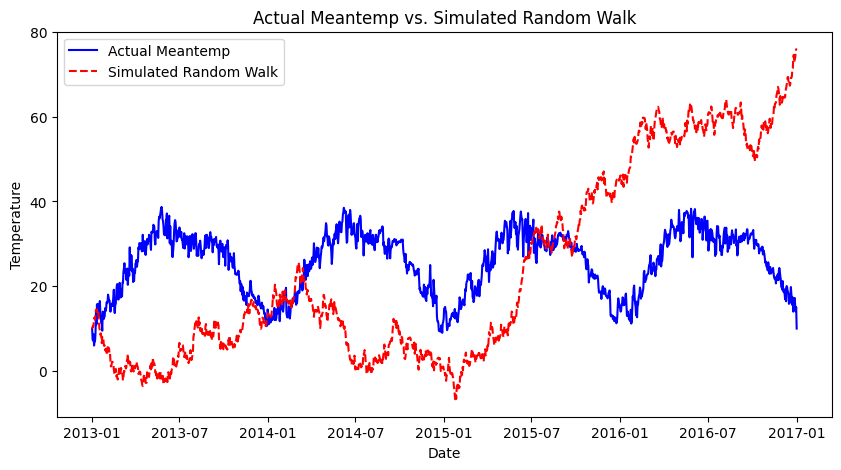

ADF Test for Actual Meantemp:
ADF Statistic: -2.0210690559206737, p-value: 0.2774121372301601

ADF Test for Simulated Random Walk:
ADF Statistic: 0.6292202578742815, p-value: 0.9883141457163427


In [ ]:
#random walk using the meantemp values.
#simulated random walk vs. the actual meantemp series graph
#to check the time series is stationary using the Augmented Dickey-Fuller (ADF) test.
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Extract meantemp data
actual_meantemp = df_train['meantemp'].values

# Simulate a random walk
np.random.seed(42)  # For reproducibility
random_walk = [actual_meantemp[0]]  # Start with first temp value

for t in range(1, len(actual_meantemp)):
    random_walk.append(random_walk[-1] + np.random.normal(0, 1))  # Xt = Xt-1 + εt

# Convert to NumPy array
random_walk = np.array(random_walk)

# Plot actual vs. simulated random walk
plt.figure(figsize=(10,5))
plt.plot(df_train['date'], actual_meantemp, label="Actual Meantemp", color='blue')
plt.plot(df_train['date'], random_walk, label="Simulated Random Walk", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.title("Actual Meantemp vs. Simulated Random Walk")
plt.show()

# Perform Augmented Dickey-Fuller (ADF) test for stationarity
adf_actual = adfuller(actual_meantemp)
adf_random_walk = adfuller(random_walk)

# Print ADF test results
print("ADF Test for Actual Meantemp:")
print(f"ADF Statistic: {adf_actual[0]}, p-value: {adf_actual[1]}")

print("\nADF Test for Simulated Random Walk:")
print(f"ADF Statistic: {adf_random_walk[0]}, p-value: {adf_random_walk[1]}")


In [ ]:
#ADF Test Results:
# p-value < 0.05 → Data is stationary.
# p-value > 0.05 → Data is non-stationary.
# Analysis of ADF Test Results:
# Actual Meantemp: p-value = 0.2774 ( > 0.05) → Non-stationary
# Simulated Random Walk: p-value = 0.9883 ( > 0.05) → Non-stationary

In [ ]:
# Wind Speed Analysis (Step 4)
# Now, let's analyze whether wind_speed behaves like white noise using:

# Autocorrelation Function (ACF) plot to check dependencies.
# Durbin-Watson test to measure randomness.

<Figure size 1000x500 with 0 Axes>

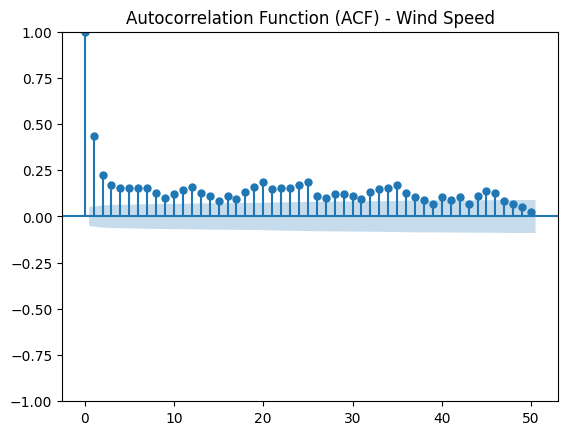

Durbin-Watson Test Statistic: 0.34894580838479333


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson

# Plot ACF for wind speed
plt.figure(figsize=(10,5))
plot_acf(df_train['wind_speed'], lags=50)
plt.title("Autocorrelation Function (ACF) - Wind Speed")
plt.show()

# Perform Durbin-Watson test
dw_test = durbin_watson(df_train['wind_speed'])
print(f"Durbin-Watson Test Statistic: {dw_test}")


In [ ]:
# wind speed is not purely random (not white noise). It has a strong positive autocorrelation, meaning today's wind speed is highly dependent on previous days' wind speed.

In [ ]:
#DW ~ 2.0 → Data is random (white noise) ✅
# DW < 2.0 (closer to 0) → Strong positive autocorrelation ❌
# DW > 2.0 → Negative autocorrelation ❌

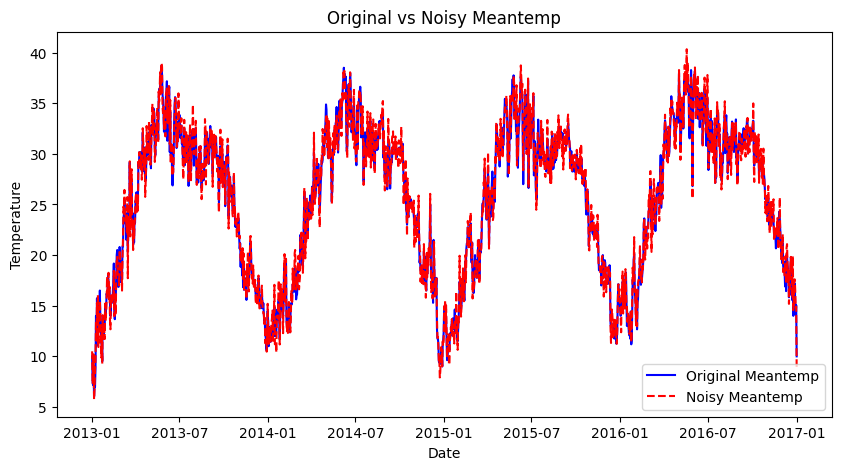

In [ ]:
# Adding Gaussian Noise to Meantemp (Step 5)
#new noisy temperature series vs. the original graph
#Check if noise affects trends & seasonality.
# Add Gaussian noise
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, 1, len(df_train))  # Mean = 0, Std Dev = 1
noisy_meantemp = df_train['meantemp'] + noise

# Plot original vs noisy meantemp
plt.figure(figsize=(10,5))
plt.plot(df_train['date'], df_train['meantemp'], label="Original Meantemp", color='blue')
plt.plot(df_train['date'], noisy_meantemp, label="Noisy Meantemp", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.title("Original vs Noisy Meantemp")
plt.show()


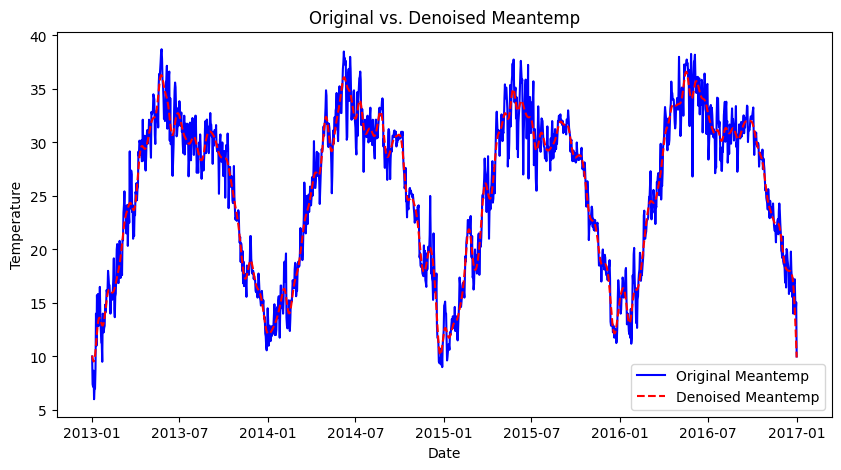

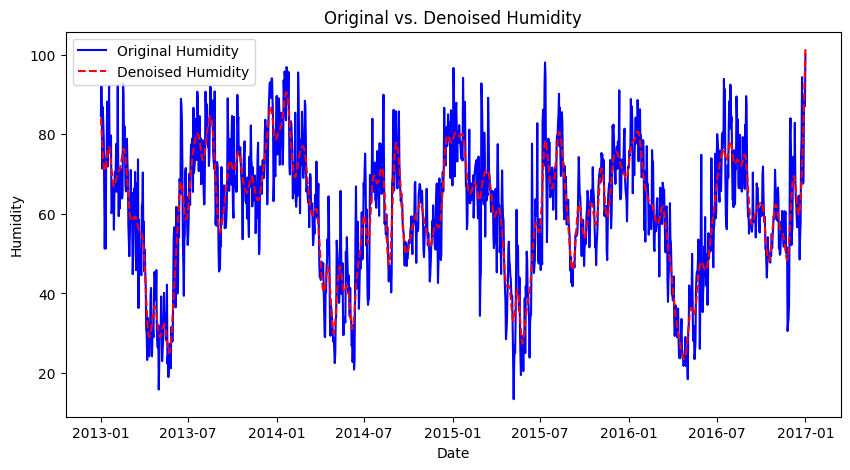

In [ ]:
from scipy.signal import butter, filtfilt

# Low-pass filter function
def lowpass_filter(data, cutoff=0.1, order=3):
    b, a = butter(order, cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Apply low-pass filter
filtered_meantemp = lowpass_filter(df_train['meantemp'])
filtered_humidity = lowpass_filter(df_train['humidity'])

# Plot original vs denoised meantemp
plt.figure(figsize=(10,5))
plt.plot(df_train['date'], df_train['meantemp'], label="Original Meantemp", color='blue')
plt.plot(df_train['date'], filtered_meantemp, label="Denoised Meantemp", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.title("Original vs. Denoised Meantemp")
plt.show()

# Plot original vs denoised humidity
plt.figure(figsize=(10,5))
plt.plot(df_train['date'], df_train['humidity'], label="Original Humidity", color='blue')
plt.plot(df_train['date'], filtered_humidity, label="Denoised Humidity", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.legend()
plt.title("Original vs. Denoised Humidity")
plt.show()


In [ ]:
# above we applied a low-pass filter to remove noise from meantemp and humidity.
# Comparing original vs. denoised signals.

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute Mean Squared Error (MSE)
mse_meantemp = mean_squared_error(df_train['meantemp'], filtered_meantemp)
mse_humidity = mean_squared_error(df_train['humidity'], filtered_humidity)

print(f"MSE (Original vs. Denoised Meantemp): {mse_meantemp:.4f}")
print(f"MSE (Original vs. Denoised Humidity): {mse_humidity:.4f}")

# Compare effectiveness
if mse_meantemp < mse_humidity:
    print("Low-pass filtering worked better for Meantemp.")
else:
    print("Low-pass filtering worked better for Humidity.")


MSE (Original vs. Denoised Meantemp): 2.1948
MSE (Original vs. Denoised Humidity): 55.6743
Low-pass filtering worked better for Meantemp.


In [ ]:
#result:Filtering improved Meantemp but less effective for Humidity due to higher natural variability.